## Linear Regression Model

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sb
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [74]:
# load the data
df = pd.read_csv(r'C:\Users\Christine\Documents\sales_data_sample.csv')
df = df.dropna()

In [75]:
df.shape

(147, 25)

In [76]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,10268.204082,33.986395,84.138639,6.673469,3446.003537,2.673469,6.986395,2003.863946,100.632653
std,106.742036,9.740458,19.897255,3.830596,1717.988835,1.171367,3.734303,0.746127,40.046562
min,10120.000000,15.000000,26.880000,1.000000,652.350000,1.000000,1.000000,2003.000000,33.000000
25%,10148.000000,26.000000,66.390000,3.000000,2249.005000,2.000000,4.000000,2003.000000,70.000000
50%,10270.000000,33.000000,98.050000,6.000000,3160.740000,3.000000,7.000000,2004.000000,99.000000
75%,10361.000000,41.000000,100.000000,10.000000,4410.060000,4.000000,11.000000,2004.000000,121.000000
max,10420.000000,66.000000,100.000000,15.000000,9774.030000,4.000000,12.000000,2005.000000,214.000000


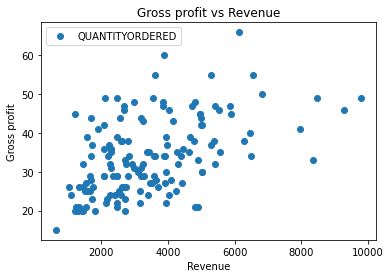

In [77]:
df.plot(x='SALES', y='QUANTITYORDERED', style='o')  
plt.title('Gross profit vs Revenue')  
plt.xlabel('Revenue')  
plt.ylabel('Gross profit')  
plt.show()

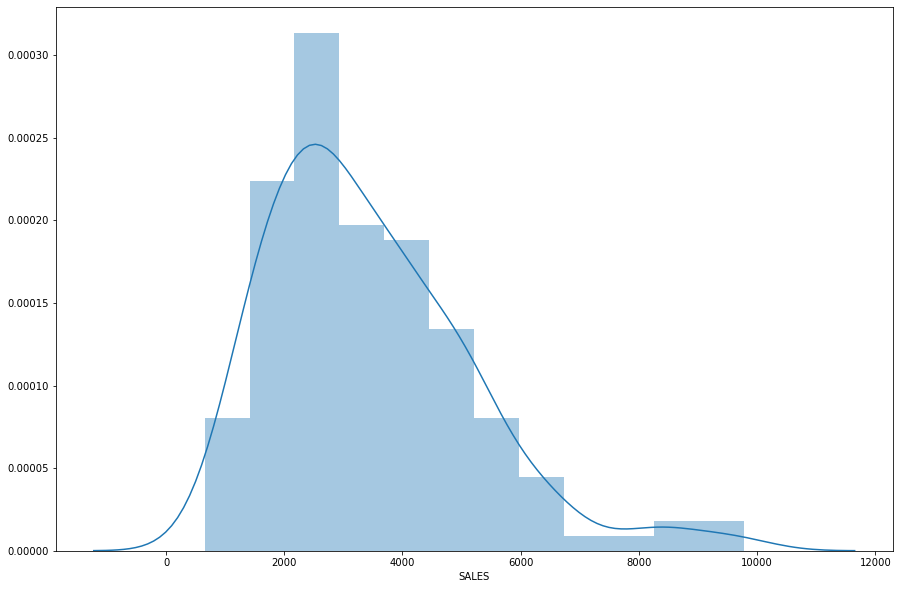

In [78]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['SALES'])

In [81]:
X = df['SALES'].values.reshape(-1,1)
y = df['QUANTITYORDERED'].values.reshape(-1,1)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [84]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[24.08577242]
[[0.00281406]]


In [85]:
y_pred = regressor.predict(X_test)

In [86]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,26,27.828191
1,29,31.030592
2,32,33.244751
3,21,31.051331
4,26,29.002499
5,27,34.014790
6,44,28.852791
7,42,29.948023
8,15,25.921525
9,40,42.248843


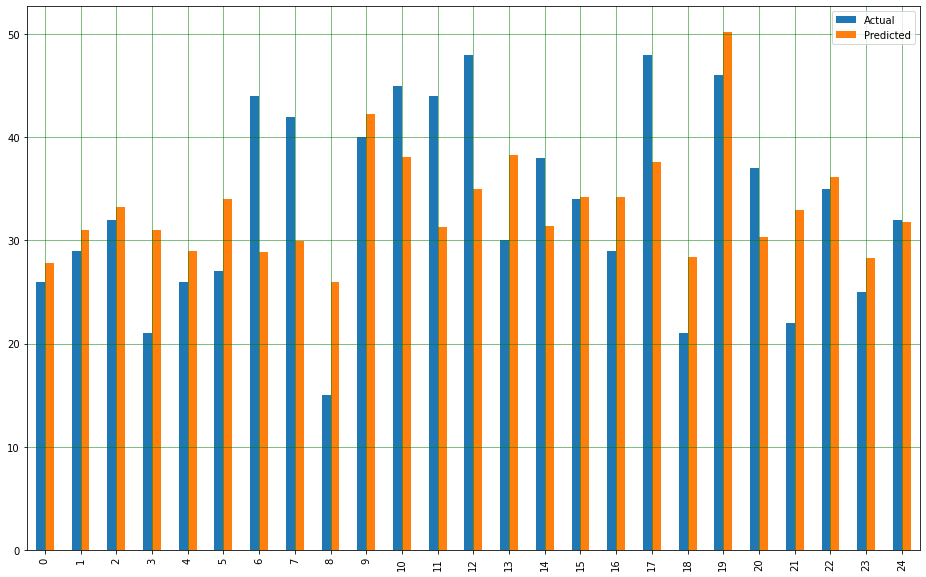

In [87]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Prediction vs Test data


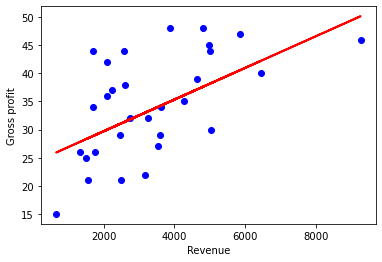

In [88]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Revenue')
plt.ylabel('Gross profit')
print('Prediction vs Test data')
plt.show()

In [89]:
# Print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## As you can see the results below, mean square error is 56%, meaning that model is halfway accurate and not a good ML indicator to use for this dataset. 
## The linear regression model test needs to achieve at least 80% or higher to be considered accurate.

6.264574093806357
56.10362075414544
7.490235026629367
